In [1]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)


In [2]:
(60000, 28, 28)
(60000,)


(60000,)

In [3]:
type(x_train)


numpy.ndarray

In [4]:
x_train.min(), x_train.max()


(np.uint8(0), np.uint8(255))

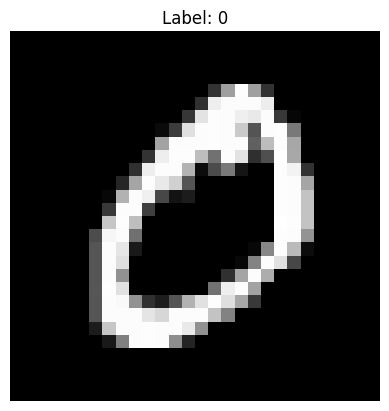

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.axis('off')
plt.show()


In [6]:
y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
x_train.min(), x_train.max()


(np.uint8(0), np.uint8(255))

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [9]:
x_train.min(), x_train.max()


(np.float64(0.0), np.float64(1.0))

In [10]:
x_train.dtype


dtype('float64')

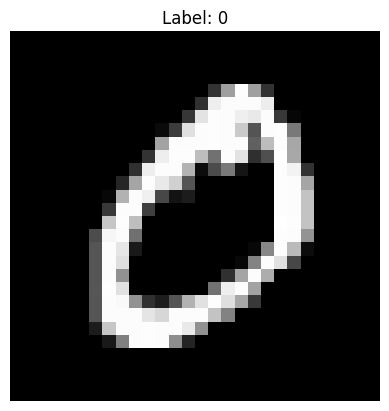

In [11]:
plt.imshow(x_train[1], cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.axis('off')
plt.show()


In [12]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),   # converts 28x28 → 784
    Dense(128, activation='relu'),   # hidden layer
    Dense(10, activation='softmax')  # output layer
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
Flatten(input_shape=(28, 28))


<Flatten name=flatten_1, built=False>

In [16]:
Dense(128, activation='relu')


<Dense name=dense_2, built=False>

In [17]:
Dense(10, activation='softmax')


<Dense name=dense_3, built=False>

In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8707 - loss: 0.4529 - val_accuracy: 0.9630 - val_loss: 0.1328
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9630 - loss: 0.1286 - val_accuracy: 0.9730 - val_loss: 0.0937
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.0799 - val_accuracy: 0.9770 - val_loss: 0.0793
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0576 - val_accuracy: 0.9785 - val_loss: 0.0797
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0468 - val_accuracy: 0.9782 - val_loss: 0.0745
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9802 - val_loss: 0.0708
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0268 - val_accuracy: 0.9788 - val_loss: 0.0778
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0207 - 

In [21]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0986
Test accuracy: 0.9793000221252441
Test loss: 0.0833035558462143


In [22]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Predicted: 7
Actual: 7


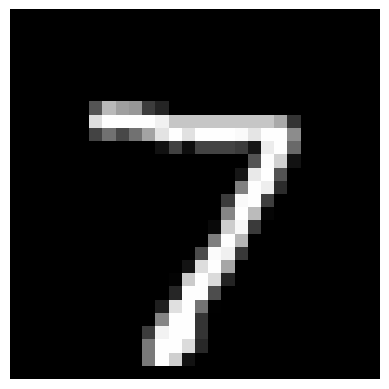

In [23]:
import numpy as np

predicted_label = np.argmax(predictions[0])
true_label = y_test[0]

print("Predicted:", predicted_label)
print("Actual:", true_label)

plt.imshow(x_test[0], cmap='gray')
plt.axis('off')
plt.show()
